# Climate shock simulation
"Park" the model at each time step and simulate the effect of a climate shock.

In [7]:
import sys
sys.path.append('G:/My Drive/Research/adaptation_abm/code')
import model.model as mod
import model.base_inputs as inp
import plot.climate_shock as plt_shock
import plot.single_run as plt
import imp
import numpy as np
import copy
imp.reload(plt)
imp.reload(mod)

<module 'model.model' from 'G:/My Drive/Research/adaptation_abm/code\\model\\model.py'>

## Define scenarios 

In [25]:
# load default params
inp_base = inp.compile()

# manually specify some variables (common to all scenarios)
inp_base['model']['T'] = 100
inp_base['model']['n_agents'] = 200
inp_base['model']['exp_name'] = 'climate_shock'
inp_base['agents']['cash_req_mean'] = 17261/2
inp_base['agents']['adap_type'] = 'coping'

# define some scenarios
scenarios = {
    'baseline' : {'model' : {'adaptation_option' : 'none'}},
    'insurance' : {'model' : {'adaptation_option' : 'insurance'}},
    'cover_crop' : {'model' : {'adaptation_option' : 'cover_crop'}},
}

## Define shock parameters

In [26]:
shock_rain_mag = 0.8 # rainfall parameter (still needs to get converted into rain-yield factor)

## Run the model

In [27]:
mods = {}
shock_data = {}
for name, vals in scenarios.items():
    # change the params
    params = copy.copy(inp_base)
    for k, v in vals.items():
        for k2, v2 in v.items():
            params[k][k2] = v2
    
    shock_data[name] = {'coping' : []}
    
    # initialize and run model
    m = mod.Model(params)
    for t in range(m.T):
        # simulate the shock
        m2 = copy.deepcopy(m) # "park" the model
        m2.climate.rain[t] = shock_rain_mag # set the shock rainfall
        m2.step() # step
        shock_data[name]['coping'].append(m2.agents.coping_rqd[t]) # save the adaptation behavior
        
        # run the regular model step
        m.step()
        
    # save the regular model objects
    mods[name] = m

In [28]:
# process the coping data
for k, v in shock_data.items():
    for k2, v2 in v.items():
        shock_data[k][k2] = np.array(v2)

## Plot

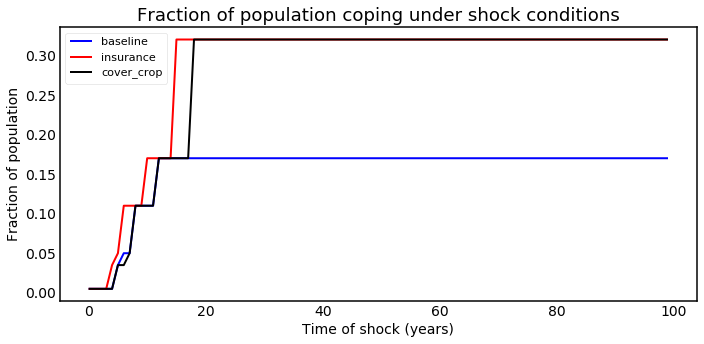

In [29]:
imp.reload(plt_shock)
plt_shock.main(mods, shock_data, save=False)